In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
#import pickle
#import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#from time import ctime
from datetime import datetime
import csv
import re

%matplotlib inline


In [2]:
datapath = "../data/"
outputs = "../outputs/"

# links
* https://darksky.net/dev/docs
* https://github.com/bitpixdigital/forecastiopy3

# Exploring metadata

In [3]:
df_rj1 = pd.read_csv(os.path.join(datapath,'Rio-Worst-Day-Flood.csv'))
df_rj2 = pd.read_csv(os.path.join(datapath,'Rio-Worst-Day-irreg.csv'))

In [4]:
dfs_dict = {}
dfs_dict = {"rj1": df_rj1, "rj2": df_rj2}

In [5]:
dfs_dict['rj1'].head()

,pub_utc_date,year,month,day,hour,polygon_slug,uuid,pubmillis,country,city,...,subtype,roadtype,longitude,latitude,nthumbsup,reliability,reportrating,confidence,magvar,reportdescription
0,2019-04-09 08:20:00.000,2019,4,9,8,17_old,8a6ee894-92fc-3158-a123-d49cf8557ec2,1554797259556,BR,Rio de Janeiro,...,HAZARD_WEATHER_FLOOD,2.0,-43.554130,-22.871565,0,5,3,0,320,NaN
1,2019-04-09 08:20:00.000,2019,4,9,8,17_old,3c9526b0-88f3-3faf-b46f-0ea4c9b04c57,1554798160249,BR,Rio de Janeiro,...,HAZARD_WEATHER_FLOOD,2.0,-43.508555,-22.863237,0,5,2,0,21,NaN
2,2019-04-09 08:20:00.000,2019,4,9,8,17_old,f1da80af-768a-3393-ba39-f0f9a73ca678,1554795354975,BR,Rio de Janeiro,...,HAZARD_WEATHER_FLOOD,2.0,-43.367349,-22.973560,0,6,4,0,90,NaN
3,2019-04-09 08:20:00.000,2019,4,9,8,17_old,333bda37-1852-336a-a275-b4bc6bb83d9b,1554796354752,BR,Rio de Janeiro,...,HAZARD_WEATHER_FLOOD,2.0,-43.357138,-22.966433,0,9,3,2,11,NaN
4,2019-04-09 08:20:00.000,2019,4,9,8,17_old,6087e955-c70a-38ca-bd6c-3bf7f57dc541,1554798143123,BR,Rio de Janeiro,...,HAZARD_WEATHER_FLOOD,2.0,-43.359448,-22.924806,0,5,4,0,261,NaN


In [6]:
dfs_dict['rj2'].head()

,Unnamed: 0,pub_utc_date,line,geometry
0,0,2019-04-09 08:12:00.000,"[(-43.216866, -22.963617), (-43.217381, -22.96...","LINESTRING (-43.216866 -22.963617, -43.217381 ..."
1,1,2019-04-09 08:11:00.000,"[(-43.216866, -22.963617), (-43.217381, -22.96...","LINESTRING (-43.216866 -22.963617, -43.217381 ..."
2,2,2019-04-09 12:01:00.000,"[(-43.366809, -22.838573), (-43.380171, -22.84...","LINESTRING (-43.366809 -22.838573, -43.380171 ..."
3,3,2019-04-09 12:01:00.000,"[(-43.185941, -22.943584), (-43.185947, -22.94...","LINESTRING (-43.185941 -22.943584, -43.185947 ..."
4,4,2019-04-09 12:01:00.000,"[(-43.397092, -22.898731), (-43.397183, -22.89...","LINESTRING (-43.397092 -22.898731, -43.397183 ..."


In [7]:
df = df_rj1.merge(df_rj2, left_on='pub_utc_date', right_on='pub_utc_date')

In [8]:
df.head()

,pub_utc_date,year,month,day,hour,polygon_slug,uuid,pubmillis,country,city,...,latitude,nthumbsup,reliability,reportrating,confidence,magvar,reportdescription,Unnamed: 0,line,geometry
0,2019-04-09 08:20:00.000,2019,4,9,8,17_old,8a6ee894-92fc-3158-a123-d49cf8557ec2,1554797259556,BR,Rio de Janeiro,...,-22.871565,0,5,3,0,320,NaN,568,"[(-43.218446, -22.965272), (-43.21854, -22.965...","LINESTRING (-43.218446 -22.965272, -43.21854 -..."
1,2019-04-09 08:20:00.000,2019,4,9,8,17_old,8a6ee894-92fc-3158-a123-d49cf8557ec2,1554797259556,BR,Rio de Janeiro,...,-22.871565,0,5,3,0,320,NaN,569,"[(-43.42131, -22.865151), (-43.422584, -22.865...","LINESTRING (-43.42131 -22.865151, -43.422584 -..."
2,2019-04-09 08:20:00.000,2019,4,9,8,17_old,3c9526b0-88f3-3faf-b46f-0ea4c9b04c57,1554798160249,BR,Rio de Janeiro,...,-22.863237,0,5,2,0,21,NaN,568,"[(-43.218446, -22.965272), (-43.21854, -22.965...","LINESTRING (-43.218446 -22.965272, -43.21854 -..."
3,2019-04-09 08:20:00.000,2019,4,9,8,17_old,3c9526b0-88f3-3faf-b46f-0ea4c9b04c57,1554798160249,BR,Rio de Janeiro,...,-22.863237,0,5,2,0,21,NaN,569,"[(-43.42131, -22.865151), (-43.422584, -22.865...","LINESTRING (-43.42131 -22.865151, -43.422584 -..."
4,2019-04-09 08:20:00.000,2019,4,9,8,17_old,f1da80af-768a-3393-ba39-f0f9a73ca678,1554795354975,BR,Rio de Janeiro,...,-22.973560,0,6,4,0,90,NaN,568,"[(-43.218446, -22.965272), (-43.21854, -22.965...","LINESTRING (-43.218446 -22.965272, -43.21854 -..."


In [12]:
file_name = os.path.join(datapath,'Rio-Worst-Day-all.csv')

In [13]:
df2 = pd.DataFrame({'name': ['Raphael', 'Donatello'],
                   'mask': ['red', 'purple'],
                   'weapon': ['sai', 'bo staff']})

df2.to_csv(file_name, index=False)

In [ ]:
df.to_csv(file_name, index=False)

# visualization
Wind Speed and Precipitation Intensity

In [792]:
hour_of_day = 12+1

prec_dict = {}
wind_dict = {}
time_list = []
for loc in ["miraflores", "montevideo", "rio_de_janeiro"]:
    file_name = os.path.join(datapath,'{}-daily_weather.csv'.format(loc))
    csv_reader = csv.reader(open(file_name, mode='r'))
    
    prec_list = []
    wind_list = []
    day_count = 0
    for row in csv_reader:
        if day_count == 0: 
            day_count += 1
            continue
        prec_list.append(float(row[3]))
        wind_list.append(float(row[4]))
        
        if loc == "miraflores":
            date = day_count #int(row[0][8:10])
            date = datetime.strptime(row[0][:10], "%Y-%m-%d").date()
            time_list.append(date)
        day_count += 1
            
    prec_dict[loc] = prec_list
    wind_dict[loc] = wind_list
prec_dict['datetime'] = time_list

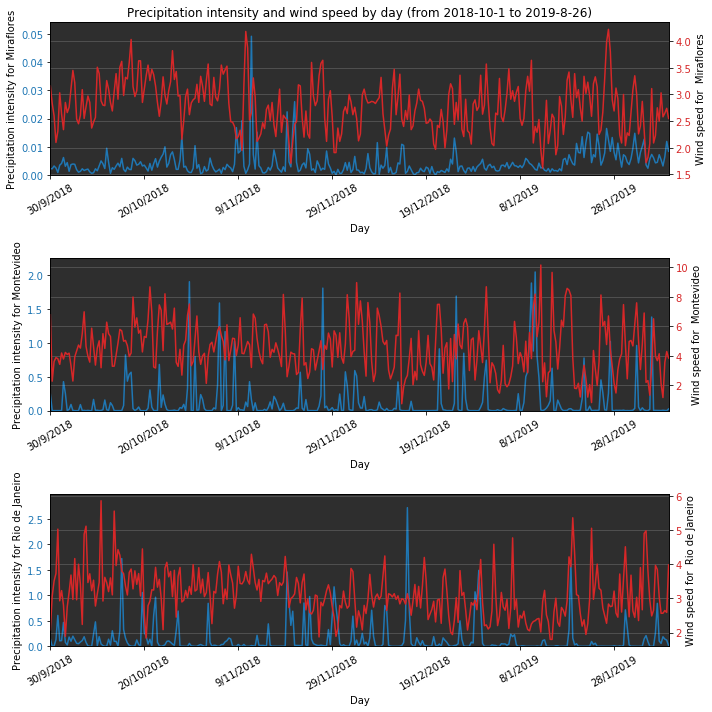

In [794]:
X = range(len(prec_dict['datetime']))
X_labels = ['{}/{}/{}'.format(i.day, i.month, i.year)  for i in prec_dict['datetime']]

legend = ['Miraflores', 'Montevideo', 'Rio_de_Janeiro']

axes2 = []
fig, (ax1a, ax1b, ax1c) = plt.subplots(3,figsize=(10,10))
axes1 = [ax1a, ax1b, ax1c]

count = 0
for city in legend:
    y = prec_dict[city.lower()] #city.lower()
    city_clean = re.sub('_', ' ', city)
    color = 'tab:blue'
    title = 'Precipitation intensity and wind speed by day (from 2018-10-1 to 2019-8-26)'
    axes1[0].set_title(title)
    axes1[count].set_xlabel('Day')
    axes1[count].set_ylabel('Precipitation intensity for {}'.format(city_clean))
    axes1[count].tick_params(axis='y', labelcolor=color)
    axes1[count].set_ylim([0, max(y)*1.1])
    axes1[count].set_xlim([0, max(X)])
    axes1[count].set_facecolor("#2E2E2E")
    axes1[count].plot(X, y, color)
    
    axes1[count].set_xticklabels([X_labels[i] for i in X if i%20==0], rotation=30)
    
    y = wind_dict[city.lower()]
    color = 'tab:red'
    ax_right = axes1[count].twinx()
    axes2.append(ax_right)
    axes2[count].set_ylabel('Wind speed for  {}'.format(city_clean))
    axes2[count].plot(X, y, color)
    axes2[count].tick_params(axis='y', labelcolor=color)
    
    plt.grid(True, color="white", alpha=0.2)
    
    fig.tight_layout()
    count += 1
file = os.path.join(outputs,'weather.png')
plt.savefig(file)

# Altair
https://altair-viz.github.io/user_guide/compound_charts.html

https://github.com/altair-viz/altair/issues/873

different  scales
https://github.com/altair-viz/altair/issues/1138

demos
https://altair-viz.github.io/user_guide/interactions.html

In [311]:
import altair as alt
from vega_datasets import data
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

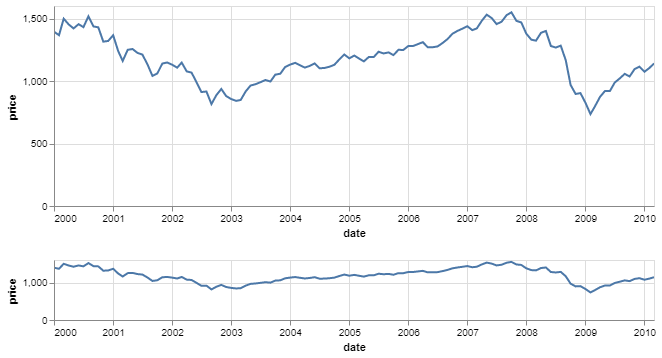

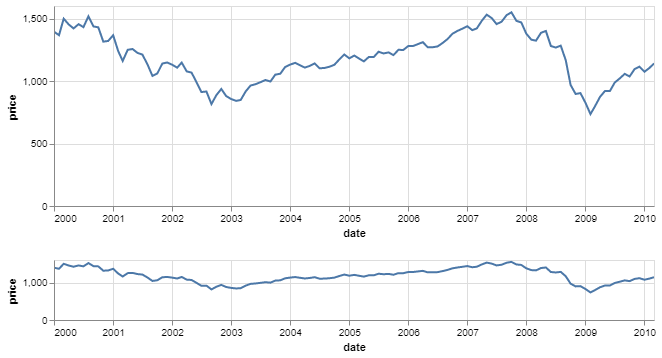

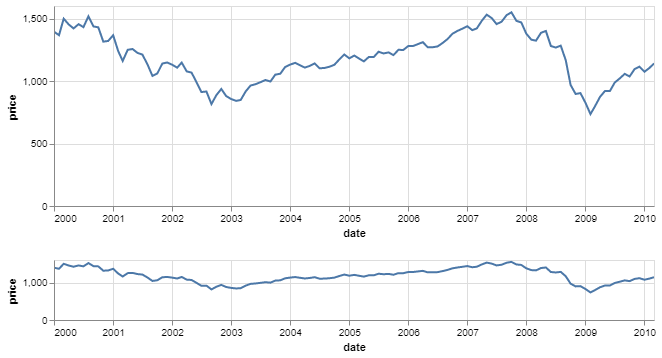

In [314]:

sp500 = data.sp500.url

brush = alt.selection(type='single', encodings=['x'])

upper = alt.Chart(sp500).mark_line().encode(
    x=alt.X('date:T', scale=alt.Scale(domain=brush)),
    y='price:Q'
).properties(
    width=600,
    height=200
)

lower = upper.properties(
    height=60
).add_selection(brush)

alt.vconcat(upper, lower)

In [498]:
data.cars

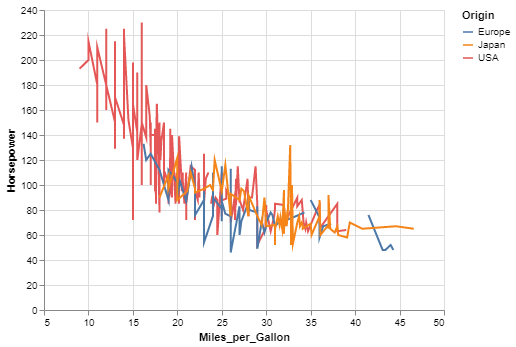

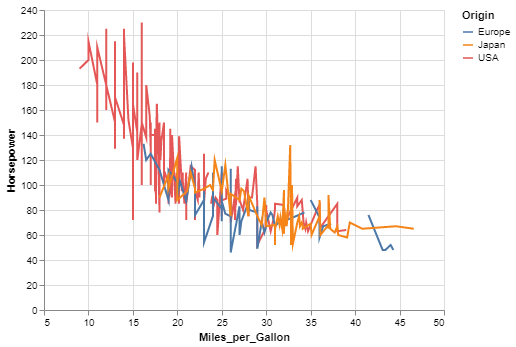

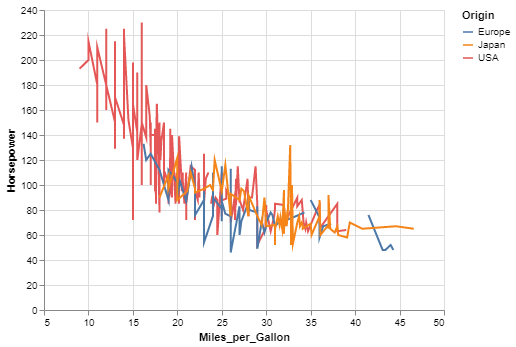

In [491]:
import altair as alt
from vega_datasets import data

cars = data.cars.url

alt.Chart(cars).mark_line().encode(
    x='Miles_per_Gallon:Q',
    y='Horsepower:Q',
    color='Origin:N'
)

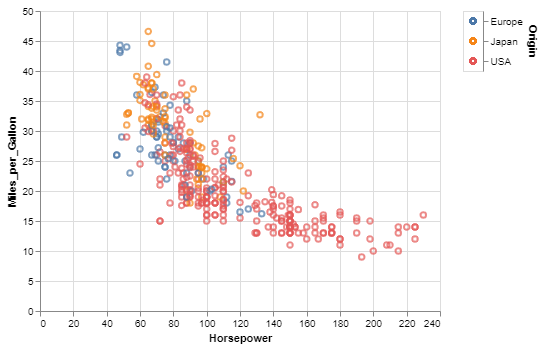

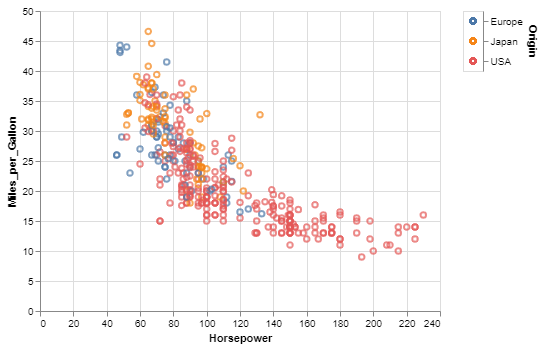

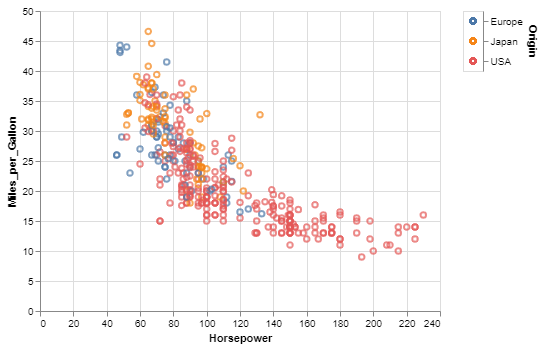

In [496]:
selection = alt.selection_multi(fields=['Origin'])
color = alt.condition(selection,
                      alt.Color('Origin:N', legend=None),
                      alt.value('lightgray'))

scatter = alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=color,
    tooltip='Name:N'
)

legend = alt.Chart(cars).mark_point().encode(
    y=alt.Y('Origin:N', axis=alt.Axis(orient='right')),
    color=color
).add_selection(
    selection
)

scatter | legend

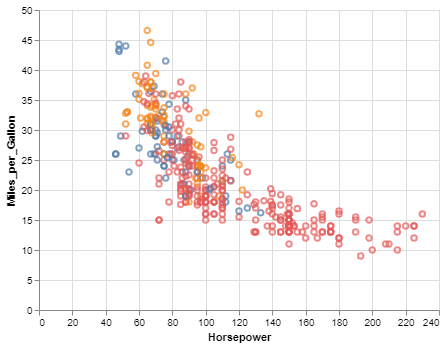

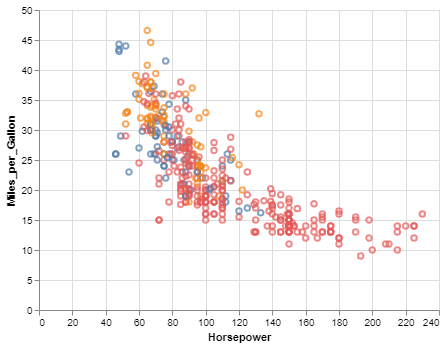

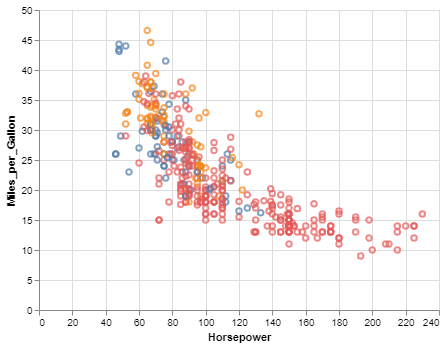

In [497]:
input_dropdown = alt.binding_select(options=['Europe','Japan','USA'])
selection = alt.selection_single(fields=['Origin'], bind=input_dropdown, name='Country of ')
color = alt.condition(selection,
                    alt.Color('Origin:N', legend=None),
                    alt.value('lightgray'))

alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=color,
    tooltip='Name:N'
).add_selection(
    selection
)

### worst day or quantile

In [795]:
def get_quantile_or_worst(city, quantile=True, QUANTILE=0.8):
    file_name = os.path.join(datapath,'{}-daily_weather.csv'.format(city))
    csv_reader = csv.reader(open(file_name, mode='r'))
    
    prec_list = []
    count = -1
    for row in csv_reader:
        count +=1
        if count == 0: continue
        prec_list.append(float(row[3]))
    temp_sorted = prec_list[:]
    temp_sorted.sort()
    print(max(prec_list))
    if quantile == True:
        print(prec_dict['datetime'][prec_list.index(temp_sorted[int(QUANTILE*len(temp_sorted))])+1])
    if quantile == False: #get worst day
        print(prec_dict['datetime'][prec_list.index(max(prec_list))+1])

Get data. If you want the worst day, simply type quantile = False. Else, use the format below
```python
get_quantile_or_worst("rio_de_janeiro", quantile=True, QUANTILE=0.8)
```

In [796]:
get_quantile_or_worst("rio_de_janeiro", quantile=False)

2.7219333333333338
2019-04-09


In [797]:
get_quantile_or_worst("montevideo", quantile=False)

2.0475
2019-06-16


In [798]:
get_quantile_or_worst("miraflores", quantile=False)

0.0492
2019-01-16


In [620]:
prec_list.index(max(prec_list))

190

delete below

In [603]:
file_name = os.path.join(datapath,'{}-daily_weather.csv'.format("rio_de_janeiro"))
csv_reader = csv.reader(open(file_name, mode='r'))

prec_list = []
count = -1
#day_count = 0
for row in csv_reader:
    count +=1
    if count == 0: continue

    prec_list.append(float(row[3]))
    
    #date = day_count #int(row[0][8:10])
    #time_list.append(date)
    #day_count += 1

In [601]:
temp_sorted = prec_list[:]
temp_sorted.sort()
QUANTILE = 0.9999
prec_dict['datetime'][prec_list.index(temp_sorted[int(QUANTILE*len(temp_sorted))])+1]
#if worst day
prec_dict['datetime'][prec_list.index(max(prec_list))+1]

datetime.datetime(2019, 4, 9, 0, 0)

### get hourly data from worst day

In [ ]:
prec_dict = {}
wind_dict = {}
time_list = []

loc = "miraflores"
file_name = os.path.join(datapath,'{}-weather.csv'.format(loc))
csv_reader = csv.reader(open(file_name, mode='r'))

prec_list = []
wind_list = []
#count = -1
day_count = 0
for row in csv_reader:
    #count +=1
    if day_count == 257: print('done')
    if day_count == 0: 
        day_count += 1
        continue
    prec_list.append(float(row[3]))
    wind_list.append(float(row[4]))
    
    if loc == "miraflores":
        date = day_count #int(row[0][8:10])
        time_list.append(date)
    day_count += 1/24
        
prec_dict[loc] = prec_list
wind_dict[loc] = wind_list

prec_dict['datetime'] = time_list

# tests